<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [157]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB as MB
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
%matplotlib inline

In [158]:
#importing dataset
salary_train = pd.read_csv("/content/SalaryData_Train (1).csv")
salary_test = pd.read_csv("/content/SalaryData_Test (2).csv")
string_columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

Exploratory data analysis 

In [159]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [160]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [161]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [162]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [163]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [164]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [165]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [166]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [167]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in string_columns:
    salary_train[i] = number.fit_transform(salary_train[i])
    salary_test[i] = number.fit_transform(salary_test[i])

In [168]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
colnames = salary_train.columns
len(colnames[0:13])
trainX = salary_train[colnames[0:13]]
trainY = salary_train[colnames[13]]
testX  = salary_test[colnames[0:13]]
testY  = salary_test[colnames[13]]

In [169]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [170]:
trainX

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [171]:
trainY

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [172]:
testX

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [173]:
# train a Gaussian Naive Bayes classifier on the training set
gnb = GaussianNB()
gnb.fit(trainX, trainY)

GaussianNB()

In [174]:
y_pred = gnb.predict(testX)
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [175]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(testY, y_pred)))

Model accuracy score: 0.7947


In [176]:
#Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(trainX)
y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [177]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(trainY, y_pred_train)))

Training-set accuracy score: 0.7953


In [178]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(gnb.score(trainX, trainY)))
print('Test set score: {:.4f}'.format(gnb.score(testX, testY)))

Training set score: 0.7953
Test set score: 0.7947


In [179]:
#The training-set accuracy score is 0.7953 while the test-set accuracy to be 0.7947. These two values are quite comparable. So, there is no sign of overfitting

In [180]:
#Visualizing the result

In [181]:
# Print the Confusion Matrix and slice it into four pieces

In [182]:
cm = confusion_matrix(testY, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10759   601]
 [ 2491  1209]]

True Positives(TP) =  10759

True Negatives(TN) =  1209

False Positives(FP) =  601

False Negatives(FN) =  2491


<Axes: >

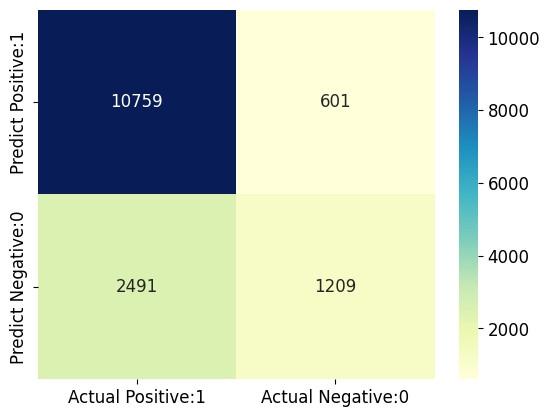

In [183]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [184]:
#Classification metrices 
from sklearn.metrics import classification_report
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [185]:
# CLASSIFICATION ACCURACY AND CLASSIFICATION ERROR
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('Classification error : {0:0.4f}'.format(classification_error))

Classification accuracy : 0.7947
Classification error : 0.2053


In [186]:
# TO FIND PRECISION , RECALL / FALSE POSITITIVE RATE ,SPECIFICITY ,TRUE POSITIVE RATE
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
specificity = TN / (TN + FP)
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Precision : 0.9471
Recall or Sensitivity : 0.8120
True Positive Rate : 0.8120
Specificity : 0.6680


In [187]:
#Calculate class probabilities 
# print the first 10 predicted probabilities of two classes- 0 and 1
#There are 2 columns which correspond to 2 classes - CLASS-0--(<=50K) and CLASS-1 --(>50K).
y_pred_prob = gnb.predict_proba(testX)[0:10]
y_pred_prob 

array([[9.99996933e-01, 3.06748413e-06],
       [9.24531822e-01, 7.54681781e-02],
       [9.57529122e-01, 4.24708780e-02],
       [3.56671905e-13, 1.00000000e+00],
       [9.99991090e-01, 8.90964666e-06],
       [1.30041077e-02, 9.86995892e-01],
       [9.99911559e-01, 8.84414581e-05],
       [9.99692038e-01, 3.07961799e-04],
       [2.49518770e-09, 9.99999998e-01],
       [8.28798617e-01, 1.71201383e-01]])

In [188]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999969e-01,0.000003
1,9.245318e-01,0.075468
2,9.575291e-01,0.042471
3,3.566719e-13,1.000000
4,9.999911e-01,0.000009
5,1.300411e-02,0.986996
6,9.999116e-01,0.000088
7,9.996920e-01,0.000308
8,2.495188e-09,1.000000
9,8.287986e-01,0.171201


In [189]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K
gnb.predict_proba(testX)[0:10, 1]

array([3.06748413e-06, 7.54681781e-02, 4.24708780e-02, 1.00000000e+00,
       8.90964666e-06, 9.86995892e-01, 8.84414581e-05, 3.07961799e-04,
       9.99999998e-01, 1.71201383e-01])

In [190]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(testX)[:, 1]

Text(0, 0.5, 'Frequency')

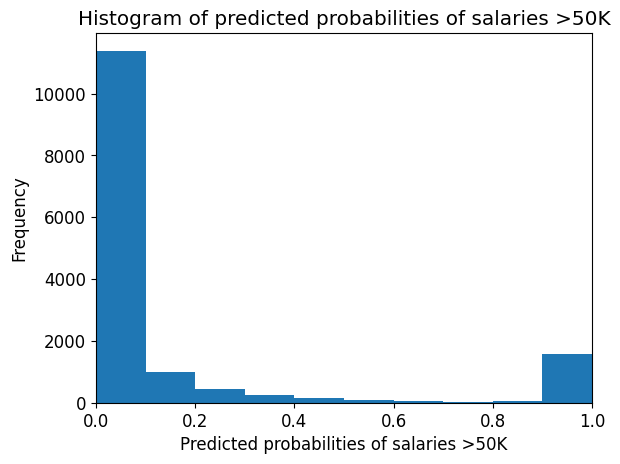

In [191]:
# plot histogram of predicted probabilities
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)
plt.title('Histogram of predicted probabilities of salaries >50K')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

small number of observations predict that the salaries will be >50K.
Majority of observations predcit that the salaries will be <=50K

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


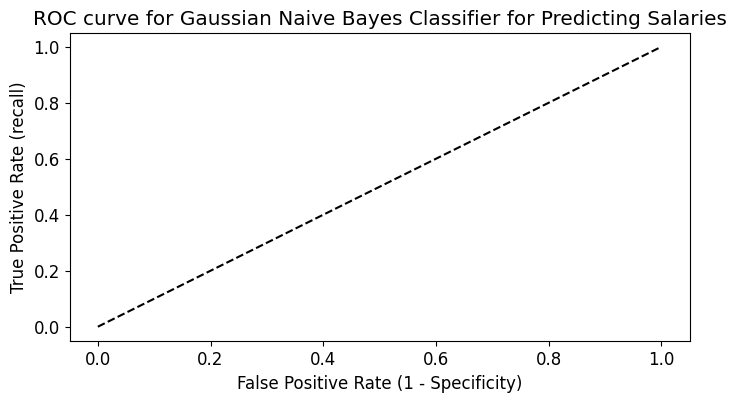

In [192]:
#ROC - AUC CURVE
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, y_pred1, pos_label = '>50K')
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.show()

In [193]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(testY, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8523


In [194]:
# Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, trainX, trainY, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79350348 0.79608753 0.78945623 0.79575597 0.79210875 0.80139257
 0.78481432 0.79741379 0.79575597 0.808687  ]


In [195]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7955


**Results and conclusion**

1. The training-set accuracy score is 0.7943 while the test-set accuracy to be 0.7957. These two values are quite comparable. So, there is no sign of overfitting.

2. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year